# LA Lakers and Crime
## The effect a LA Lakers win/lose streak has on Crime in Los Angeles

### Contents
- Data Preparation
- LA Lakers results
- Crime in Los Angeles
- LA Lakers Form
- LA Lakers Streaks

In [47]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [48]:
if not os.path.exists( "../../data/prep/600_NBA.csv" ):
    print("Missing dataset file")

In [49]:
nba = pd.read_csv("../../data/prep/600_NBA.csv", index_col="Date", parse_dates=True)
nba.shape

(5354, 8)

Sorting the dates of the games...

In [50]:
nba.sort_index(ascending=True)

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9
2007-10-31,7:00 pm,Philadelphia 76ers,97,Toronto Raptors,106,19800.0,Home Win,-9
2007-11-02,8:00 pm,Washington Wizards,83,Boston Celtics,103,18624.0,Home Win,-20
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21


# LA Lakers

We'll look at the LA Lakers...

In [51]:
la = nba[(nba.values  == "Los Angeles Lakers")]

In [52]:
la.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21
2007-11-04,6:30 pm,Utah Jazz,109,Los Angeles Lakers,119,18997.0,Home Win,-10
2007-11-06,7:30 pm,New Orleans Hornets,118,Los Angeles Lakers,104,18997.0,Away Win,14
2007-11-09,7:30 pm,Minnesota Timberwolves,93,Los Angeles Lakers,107,18997.0,Home Win,-14


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [53]:
laHome = la[la['Home/Neutral'] == 'Los Angeles Lakers']

In [54]:
conditions = [
    (laHome['PTS.1'] > laHome['PTS']),
    (laHome['PTS'] == laHome['PTS.1'])]
choices = [1, 0]
laHome['LA Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [55]:
laHome.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2,-1
2007-11-04,6:30 pm,Utah Jazz,109,Los Angeles Lakers,119,18997.0,Home Win,-10,1
2007-11-06,7:30 pm,New Orleans Hornets,118,Los Angeles Lakers,104,18997.0,Away Win,14,-1
2007-11-09,7:30 pm,Minnesota Timberwolves,93,Los Angeles Lakers,107,18997.0,Home Win,-14,1
2007-11-16,7:30 pm,Detroit Pistons,91,Los Angeles Lakers,103,18997.0,Home Win,-12,1


and now their away games...

In [56]:
laAway = la[la['Visitor/Neutral'] == 'Los Angeles Lakers']

In [57]:
conditions = [
    (laAway['PTS'] > laAway['PTS.1']),
    (laAway['PTS'] == laAway['PTS.1'])]
choices = [1, 0]
laAway['LA Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [58]:
laAway.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21,1
2007-11-13,7:30 pm,Los Angeles Lakers,92,San Antonio Spurs,107,18797.0,Home Win,-15,-1
2007-11-14,8:00 pm,Los Angeles Lakers,93,Houston Rockets,90,18178.0,Away Win,3,1
2007-11-20,7:00 pm,Los Angeles Lakers,134,Indiana Pacers,114,11577.0,Away Win,20,1
2007-11-21,7:00 pm,Los Angeles Lakers,103,Milwaukee Bucks,110,17526.0,Home Win,-7,-1


We'll combine the 2 dataframes

In [59]:
fram1 = [laHome, laAway]
laRes = pd.concat(fram1, axis = 0)

In [60]:
laRes.tail()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2017-03-15,8:00 pm,Los Angeles Lakers,100,Houston Rockets,139,18055.0,Home Win,-39,-1
2017-03-30,8:00 pm,Los Angeles Lakers,104,Minnesota Timberwolves,119,18179.0,Home Win,-15,-1
2017-04-01,3:30 pm,Los Angeles Lakers,104,Los Angeles Clippers,115,19060.0,Home Win,-11,-1
2017-04-05,8:30 pm,Los Angeles Lakers,102,San Antonio Spurs,95,18418.0,Away Win,7,1
2017-04-12,10:30 pm,Los Angeles Lakers,94,Golden State Warriors,109,19596.0,Home Win,-15,-1


The index is sorted again

In [61]:
laRes = laRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

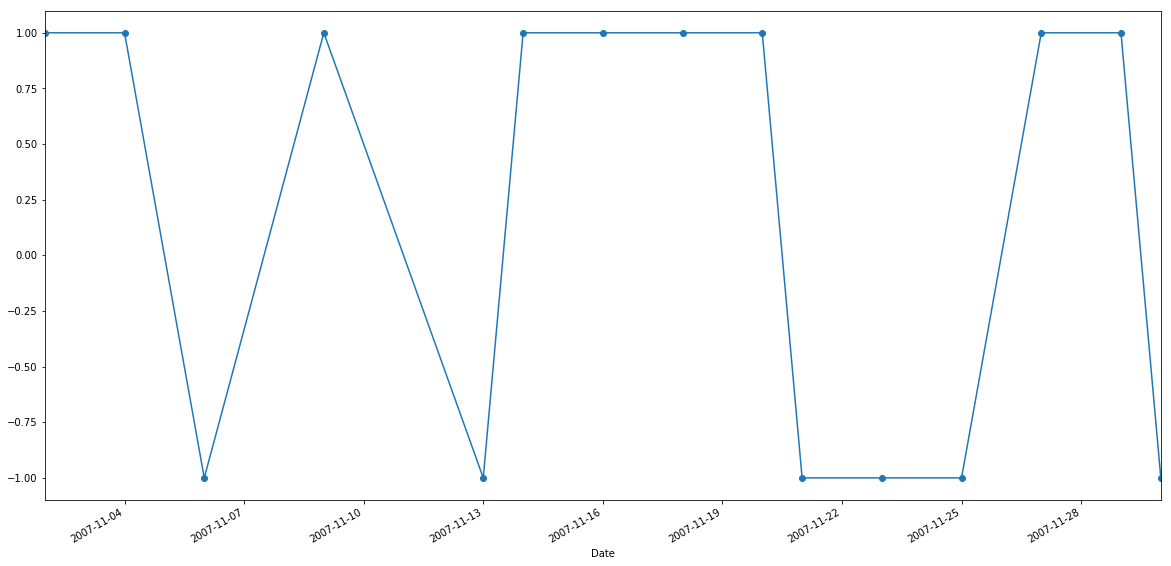

In [62]:
ctest2 = laRes.loc['2007-11-02':'2007-11-30']
ctest2['LA Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [63]:
ctest3 = laRes.loc['2009-11-02':'2010-06-30']
ctest3

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,LA Res
Date,,,,,,,,,
2009-11-03,7:00 pm,Los Angeles Lakers,101,Oklahoma City Thunder,98,18203.0,Away Win,3,1
2009-11-04,7:30 pm,Los Angeles Lakers,103,Houston Rockets,102,18291.0,Away Win,1,1
2009-11-06,7:30 pm,Memphis Grizzlies,98,Los Angeles Lakers,114,18997.0,Home Win,-16,1
2009-11-08,6:30 pm,New Orleans Hornets,88,Los Angeles Lakers,104,18997.0,Home Win,-16,1
2009-11-12,7:30 pm,Phoenix Suns,102,Los Angeles Lakers,121,18997.0,Home Win,-19,1
2009-11-13,8:30 pm,Los Angeles Lakers,79,Denver Nuggets,105,19141.0,Home Win,-26,-1
2009-11-15,6:30 pm,Houston Rockets,101,Los Angeles Lakers,91,18997.0,Away Win,10,-1
2009-11-17,7:30 pm,Detroit Pistons,93,Los Angeles Lakers,106,18997.0,Home Win,-13,1
2009-11-19,7:30 pm,Chicago Bulls,93,Los Angeles Lakers,108,18997.0,Home Win,-15,1


The unnecessary columns are now dropped...

In [64]:
laRes= laRes.drop('Visitor/Neutral', 1)
laRes= laRes.drop('PTS', 1)
laRes= laRes.drop('Home/Neutral', 1)
laRes= laRes.drop('Attend.', 1)
laRes= laRes.drop('PTS.1', 1)
laRes= laRes.drop('Result', 1)
laRes= laRes.drop('Difference', 1)

The irrelevant dates are filtered out...

In [65]:
start_remove = pd.to_datetime('2015-12-31')
end_remove = pd.to_datetime('2010-01-01')

In [66]:
laRes = laRes.loc[(laRes.index < start_remove) & (laRes.index > end_remove)]

In [67]:
laRes.head()

,Start (ET),LA Res
Date,,
2010-01-03,6:30 pm,1
2010-01-05,7:30 pm,1
2010-01-06,7:30 pm,-1
2010-01-08,7:00 pm,-1
2010-01-10,6:30 pm,1


# LA Crime

We now load in the LA crime dataset...

In [68]:
lacrime = pd.read_csv( "../../data/prep/200_LA.csv", index_col="Date", parse_dates=True)

In [69]:
lacrime.head()

,Primary Type,Premise Description,Location
Date,,,
2013-01-31 21:50:00,Vandalism,"VEHICLE, PASSENGER/TRUCK","(34.0688, -118.2394)"
2013-02-16 21:40:00,Vandalism,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0433, -118.2504)"
2013-03-19 21:30:00,Vandalism,POLICE FACILITY,"(34.0446, -118.245)"
2013-05-27 22:20:00,Vandalism,"VEHICLE, PASSENGER/TRUCK","(34.0419, -118.2485)"
2013-06-01 23:00:00,Vandalism,OTHER RESIDENCE,"(34.0445, -118.2523)"


Looking at crimes year by year...

<function matplotlib.pyplot.show>

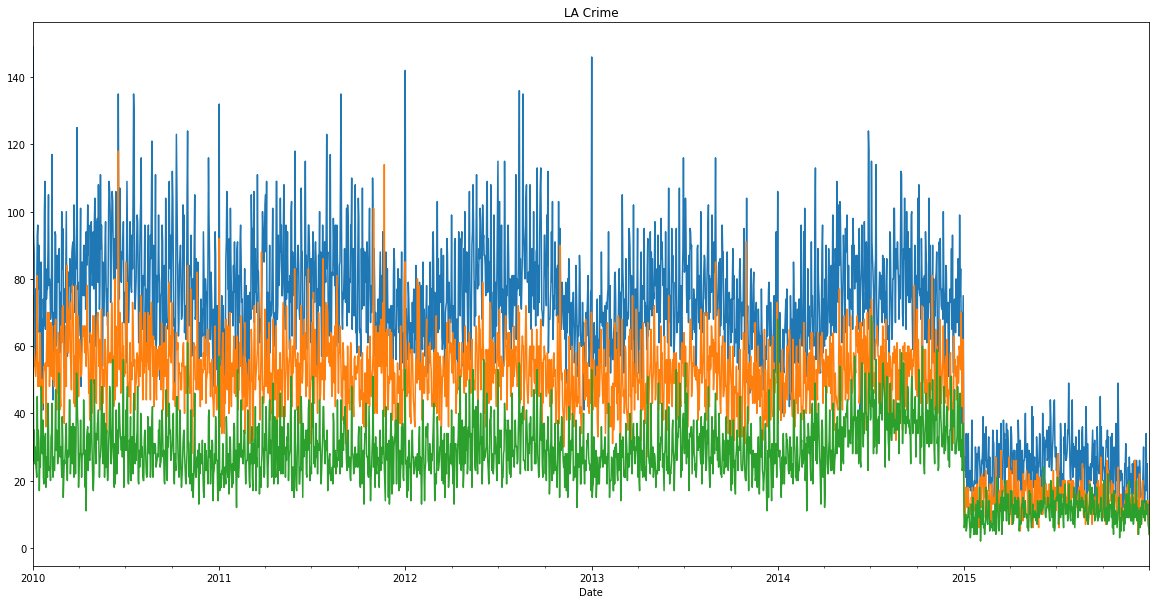

In [70]:
plt.subplot()

a1p = lacrime[lacrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = lacrime[lacrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = lacrime[lacrime['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()

plt.title('LA Crime')

plt.show

<function matplotlib.pyplot.show>

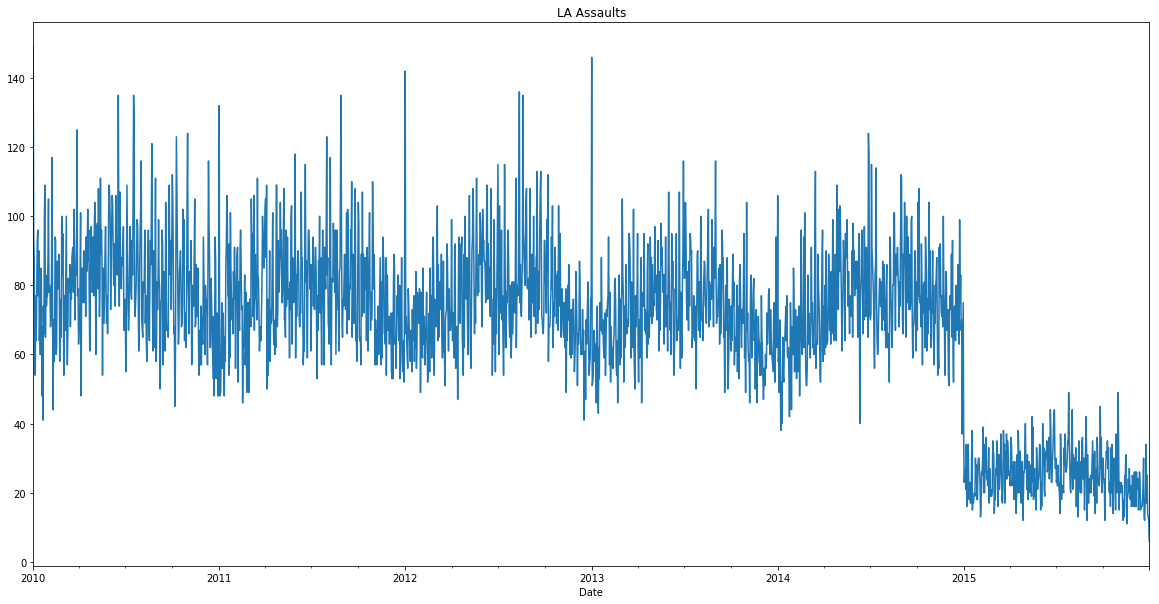

In [71]:
plt.subplot()

a1p = lacrime[lacrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('LA Assaults')

plt.show

<function matplotlib.pyplot.show>

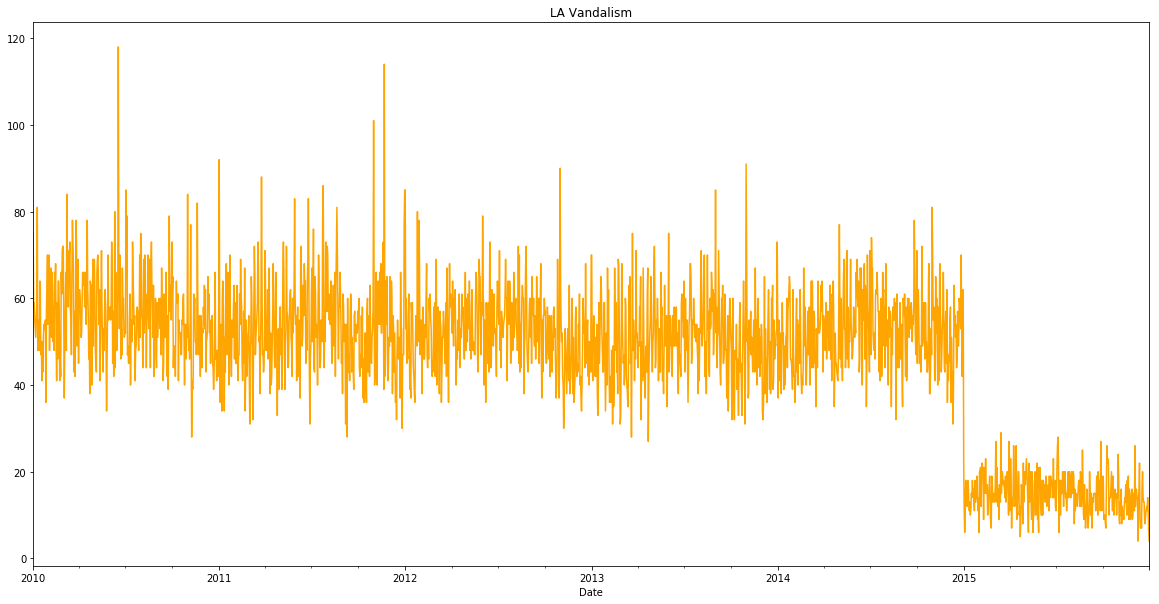

In [72]:
plt.subplot()


v1p = lacrime[lacrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('LA Vandalism')

plt.show

<function matplotlib.pyplot.show>

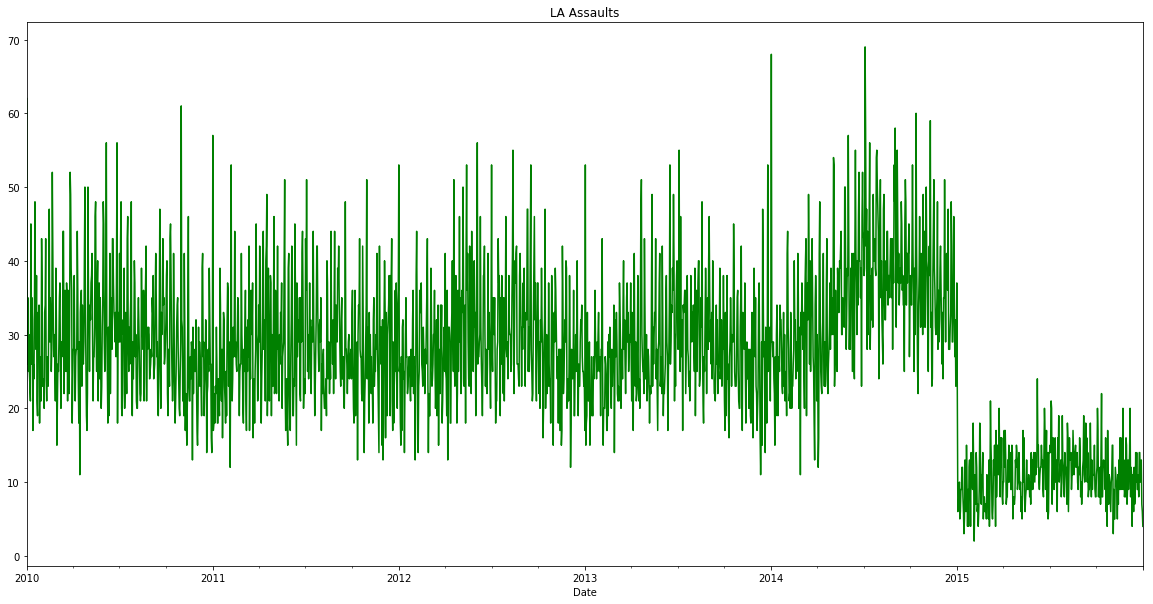

In [73]:
plt.subplot()

a1p = lacrime[lacrime['Primary Type'] == "Domestic"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('LA Assaults')

plt.show

# Crime vs Results

A day by day comparison of domestic violence and the games..

<function matplotlib.pyplot.show>

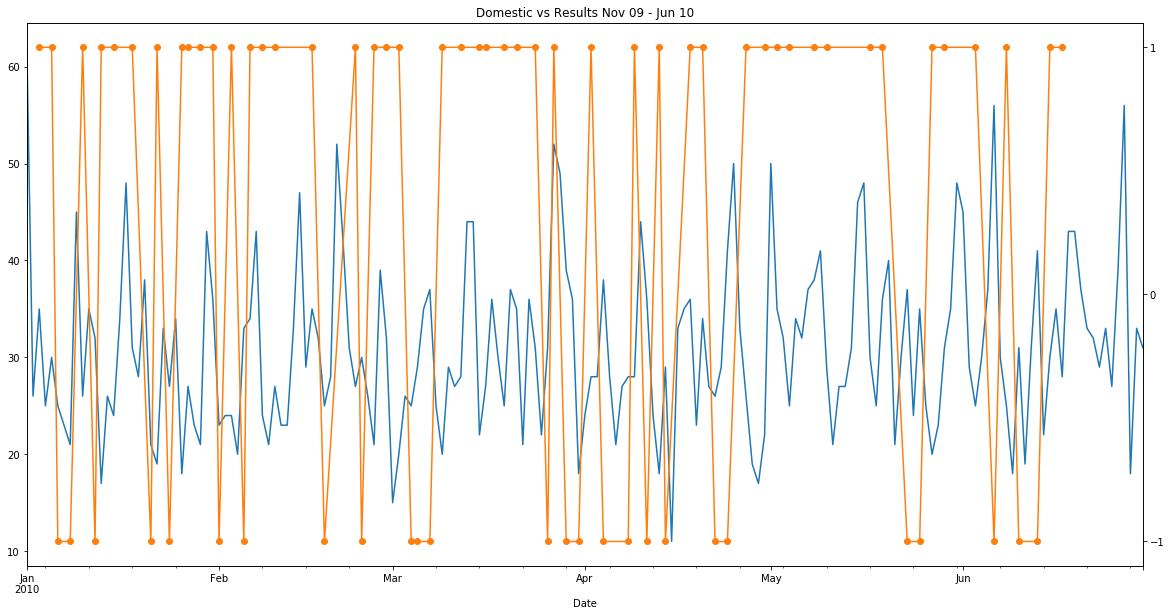

In [74]:

c1 = lacrime.loc['2009-11-02':'2010-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Domestic vs Results Nov 09 - Jun 10')

ctest5 = laRes.loc['2009-11-02':'2010-06-30']
ctest5['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

All seasons from 2010-2015...

<function matplotlib.pyplot.show>

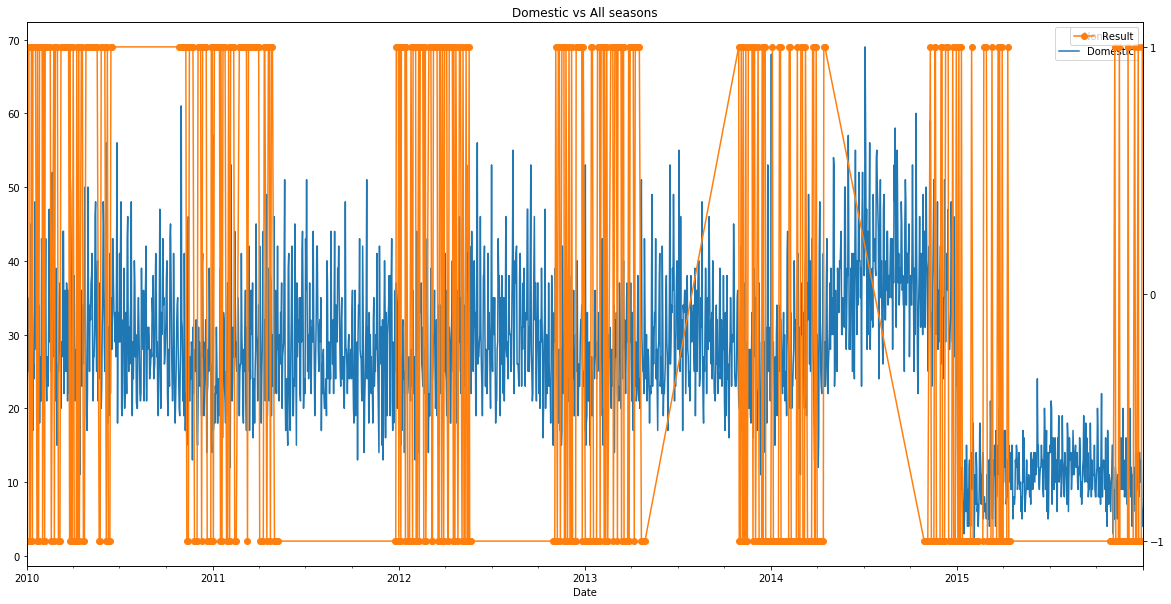

In [75]:
c1 = lacrime.loc['2007-11-02':'2017-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Domestic vs All seasons')
plt.legend(['Domestic'])

ctest7 = laRes.loc['2007-11-02':'2017-06-30']
ctest7['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

The 11/12 season was shorter

<function matplotlib.pyplot.show>

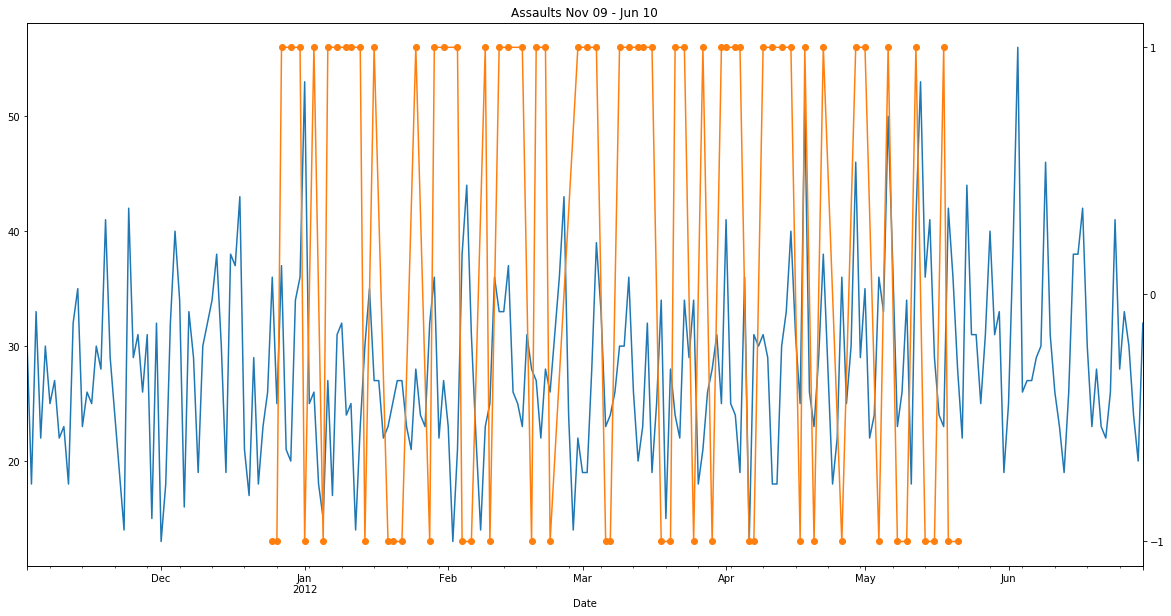

In [76]:
c1 = lacrime.loc['2011-11-02':'2012-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Assaults Nov 09 - Jun 10')

ctest8 = laRes.loc['2011-11-02':'2012-06-30']
ctest8['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

# LA Lakers Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was between December 2013 and January 2014 when their form was -16. The highest was from February to March 2011 with a sum of 16.  

In [77]:
chMonthly = laRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['LA Res'])
chMonthly.sort_values(by=['LA Res'])

,LA Res
Date,
2014-01-31,-16.0
2015-03-31,-12.0
2015-01-31,-12.0
2015-11-30,-12.0
2016-01-31,-9.0
2014-11-30,-9.0
2014-03-31,-8.0
2015-05-31,-7.0
2013-01-31,-6.0


Showing the best form with all three crimes...

<function matplotlib.pyplot.show>

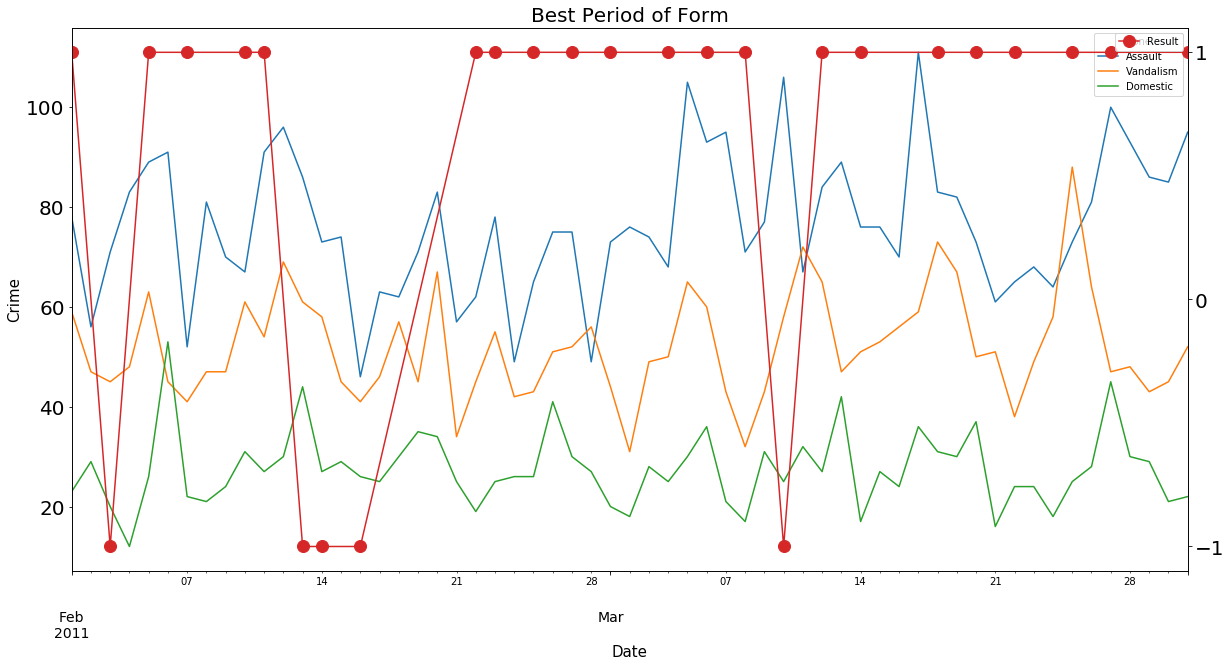

In [78]:
plt.subplot()

c = lacrime.loc['2011-02-01':'2011-03-31']
a1 = c[c['Primary Type'] == "Assault"]['Primary Type']
a1.resample('D').count().plot()

v1 = c[c['Primary Type'] == "Vandalism"]['Primary Type']
v1.resample('D').count().plot()

d1 = c[c['Primary Type'] == "Domestic"]['Primary Type']
d1.resample('D').count().plot()
plt.legend(["Assault", "Vandalism", "Domestic"])
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=20)
plt.title('Best Period of Form', fontsize = 20)

pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)

ct = laRes.loc['2011-02-01':'2011-03-31']
ct['LA Res'].plot(style='o-', ms=12,figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=20)
plt.legend([ "Result"])
plt.show

All three crimes see a rise in this period... However, an interesting point is that assault levels has a major rise when the Lakers suffer the only loss. 

Showing the worst form with all three crimes...

<function matplotlib.pyplot.show>

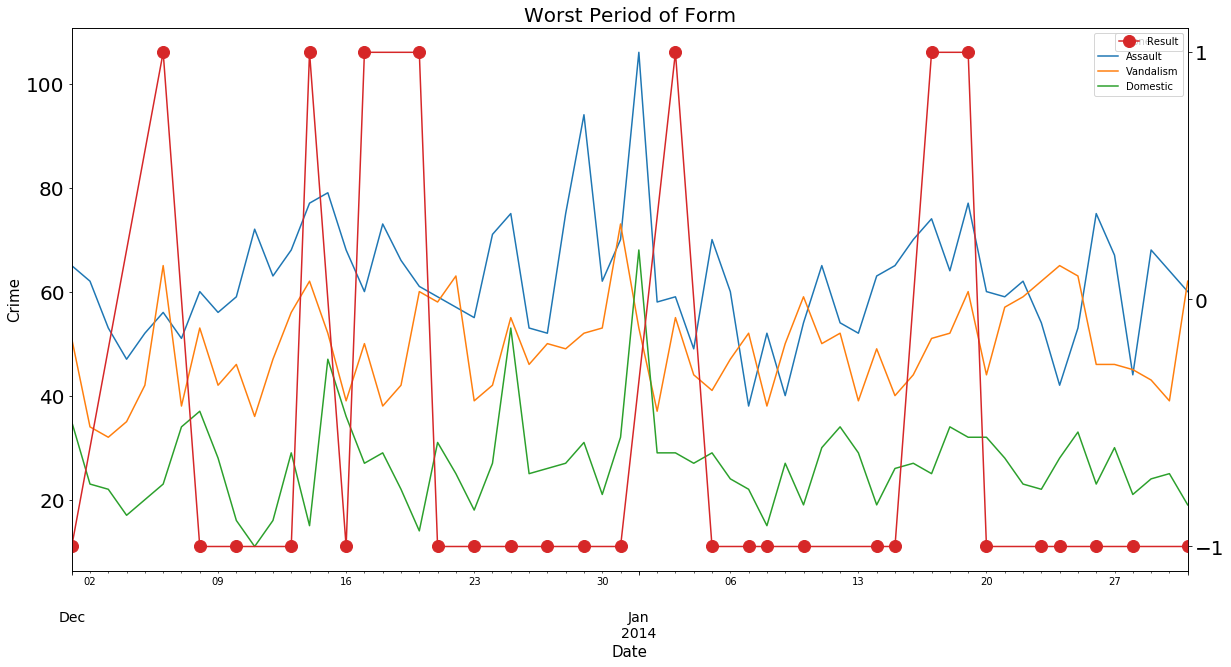

In [79]:
cp = lacrime.loc['2013-12-01':'2014-01-31']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=20)
plt.legend(["Assault", "Vandalism", "Domestic"], fontsize = 30)

plt.title('Worst Period of Form', fontsize = 20)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
ctp = laRes.loc['2013-12-01':'2014-01-31']
ctp['LA Res'].plot(style='o-', ms=12, figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=20)
plt.legend(['Result'])
plt.show

All three crimes show a fall in numbers despite the losing streak. Even in one of the only wins assault levels rise. There are gradual rises when the streaks are on-going however. 

# LA Lakers Win/Lose Streaks

A function to create streak columns

In [80]:
def streaks(laRes, col):
    sign = np.sign(laRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return laRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the laRes dataframe..

In [81]:
laRes = streaks(laRes, 'LA Res')

In [82]:
laRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526 entries, 2010-01-03 to 2015-12-30
Data columns (total 4 columns):
Start (ET)     526 non-null object
LA Res         526 non-null int32
lose_streak    526 non-null float64
win_streak     526 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 18.5+ KB


Sorting the dataframe by the losing streak column..

In [83]:
laRes.sort_values(by=['lose_streak'], ascending= False).head()

,Start (ET),LA Res,lose_streak,win_streak
Date,,,,
2015-01-27,10:30 pm,-1,9.0,0.0
2015-01-25,9:30 pm,-1,8.0,0.0
2015-11-03,10:30 pm,-1,7.0,0.0
2015-01-23,8:30 pm,-1,7.0,0.0
2015-12-01,7:00 pm,-1,7.0,0.0


Analysing the period where the worst losing streak occurred...

<function matplotlib.pyplot.show>

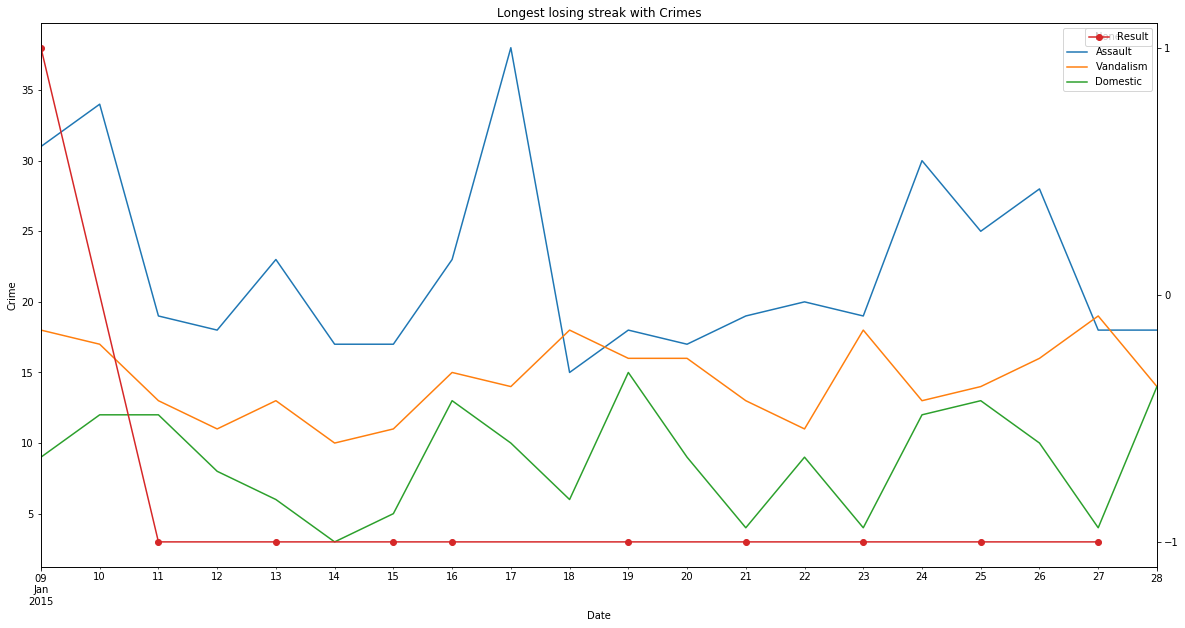

In [84]:
plt.subplot()

cp = lacrime.loc['2015-01-09':'2015-01-28']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
pylab.ylabel('Crime')
plt.legend(["Assault", "Vandalism", "Domestic"])

plt.title('Longest losing streak with Crimes')

ctp = laRes.loc['2015-01-09':'2015-01-28']
ctp['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])

plt.show

Text(0.5,1,'Longest Losing Streak with Crimes')

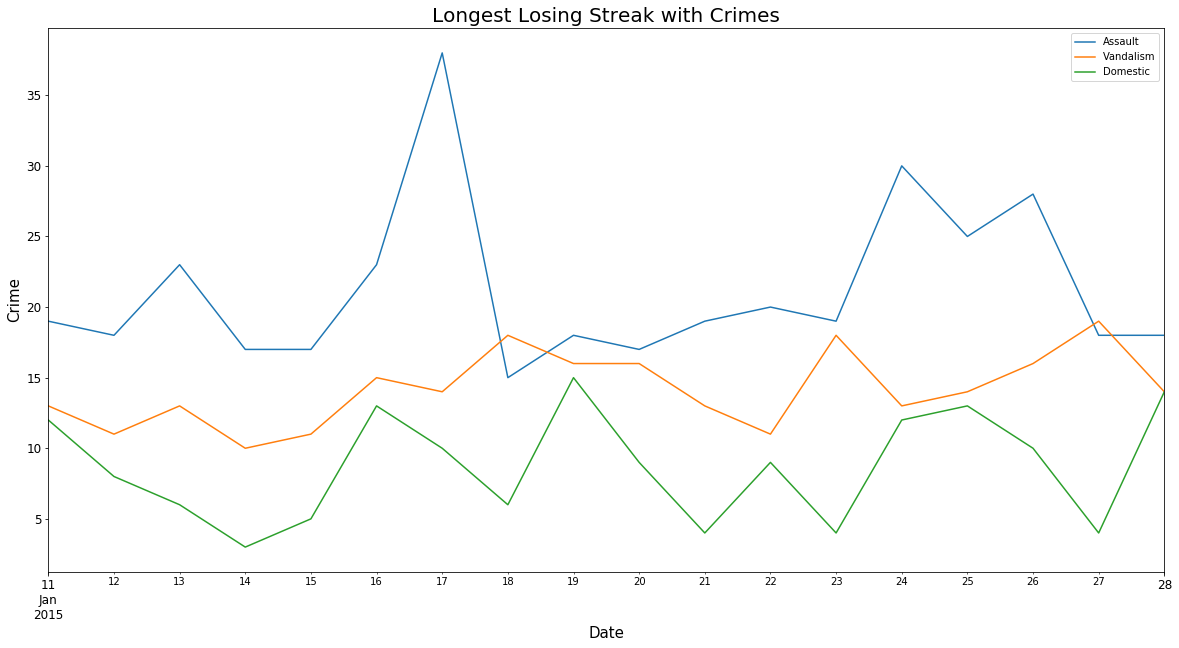

In [85]:
plt.subplot()

cp = lacrime.loc['2015-01-11':'2015-01-28']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Longest Losing Streak with Crimes', fontsize = 20)

Assault levels rise drastically in the mist of the losing streak. However, this is on a day when the Lakers are not playing. Other than that there doesn't seem to be any trend of crimes increasing as the losing streak goes on. 

Sorting the dataframe by the win streak column

In [86]:
laRes.sort_values(laRes.columns[3], ascending = False).head()

,Start (ET),LA Res,lose_streak,win_streak
Date,,,,
2010-11-09,7:30 pm,1,0.0,10.0
2011-04-01,8:30 pm,1,0.0,9.0
2010-11-07,6:30 pm,1,0.0,9.0
2010-11-05,7:30 pm,1,0.0,8.0
2011-03-31,7:30 pm,1,0.0,8.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

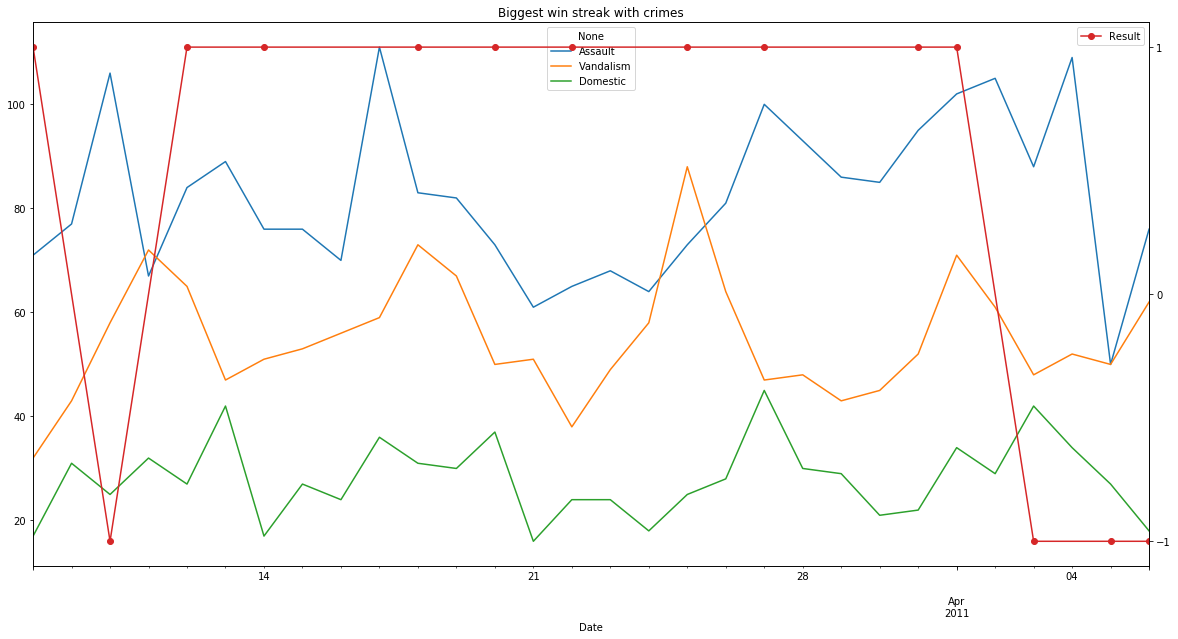

In [87]:
plt.subplot()

cp = lacrime.loc['2011-03-08':'2011-04-06']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(["Assault", "Vandalism", "Domestic"])

plt.title('Biggest win streak with crimes')

ctp = laRes.loc['2011-03-08':'2011-04-06']
ctp['LA Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(["Result"])
plt.show

Text(0.5,1,'Longest Winning Streak with Crimes')

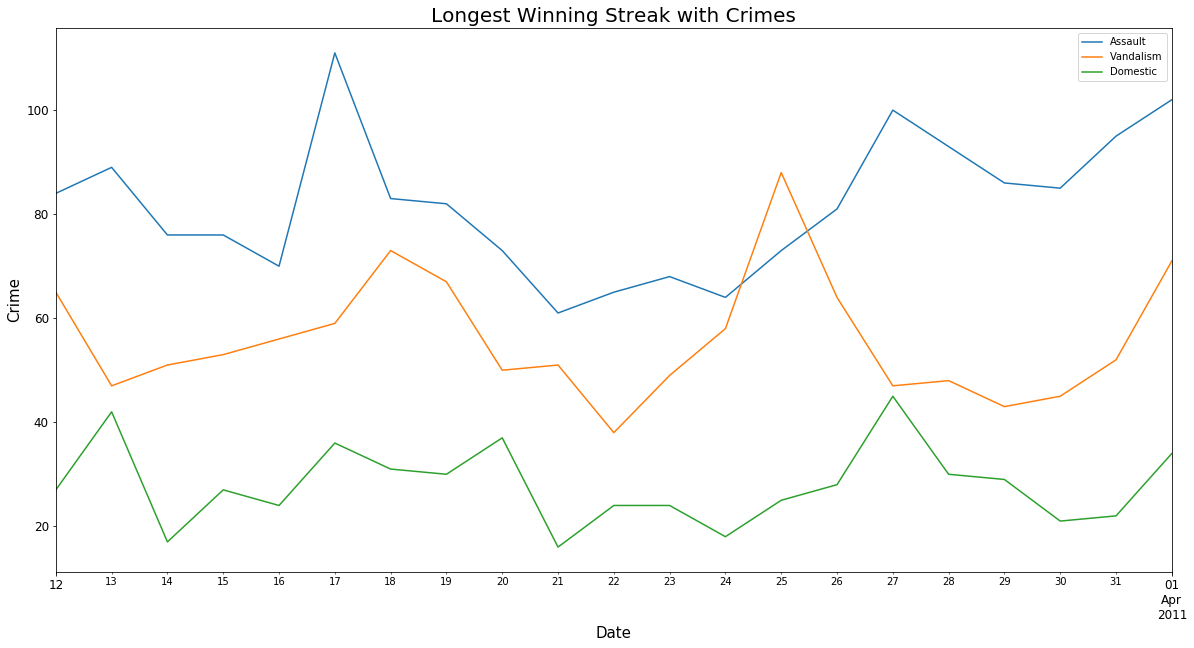

In [88]:
plt.subplot()

cp = lacrime.loc['2011-03-12':'2011-04-01']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Longest Winning Streak with Crimes', fontsize = 20)

The assault figures are extremely interesting here. There is a large spike when the Lakers lose before the streak and after the streak. In the middle for the most part the figures fall on the days of games, when the team obviously wins. For both vandalism and domestic the highest point is in the middle of the win streak. 

### Comparing Longest Streaks

In [89]:
cp = lacrime.loc['2015-01-11':'2015-01-27']

print('Daily average for Losing Streak:')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = lacrime.loc['2011-03-12':'2011-04-02']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 21.41176470588235
Vandalism = 14.176470588235293
Domestic = 8.411764705882353
 
Daily average for Winning Streak:
Assault = 82.81818181818181
Vandalism = 56.18181818181818
Domestic = 28.0


There is a huge difference in the crime levels from the losing streak to the winning streak and it is not in the way one expects. The period for the winning streak has a far higher level of crime. This is probably due to the time of year, as the losing streak comes in 2015 when the crime rate was far lower. 

### Comparing with period before Streaks

In [90]:
cp = lacrime.loc['2011-02-22':'2011-03-12']

print('Period before Winning Streak')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = lacrime.loc['2011-03-12':'2011-04-02']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winning Streak
Assault = 75.89473684210526
Vandalism = 50.31578947368421
Domestic = 26.526315789473685
 
Period of Winning Streak:
Assault = 82.81818181818181
Vandalism = 56.18181818181818
Domestic = 28.0


Each crime rises during this period. This tells us the winning streak doesn't have a positive impact on crime. 

In [91]:
cp = lacrime.loc['2014-12-19':'2015-01-09']

print('Period before Losing Streak')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Losing Streak:')

cp0 = lacrime.loc['2015-01-09':'2015-01-28']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Losing Streak
Assault = 53.54545454545455
Vandalism = 38.04545454545455
Domestic = 23.727272727272727
 
Period of Losing Streak:
Assault = 22.35
Vandalism = 14.5
Domestic = 8.9


The crime during the losing streak is far lower. This seems to be due to a problem with the data. There seems to be far less crime being recored after the start of 2015. 